In [1]:
import sys
from pathlib import Path

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    # main,
)

modkit found with expected version 0.2.4


In [2]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

System: Linux
Release: 6.8.0-51-generic
Version: #52~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Dec  9 15:00:52 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.75 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.…

          |    0%

          | Transferring 2925 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2925   0% | 00:00<…

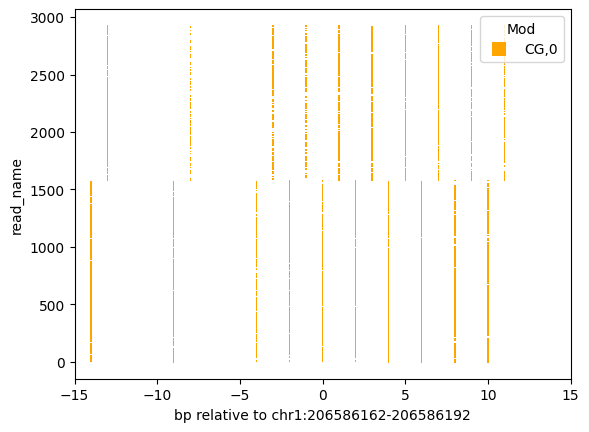

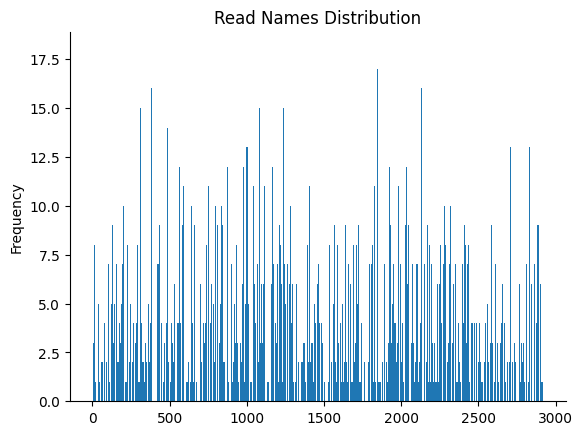

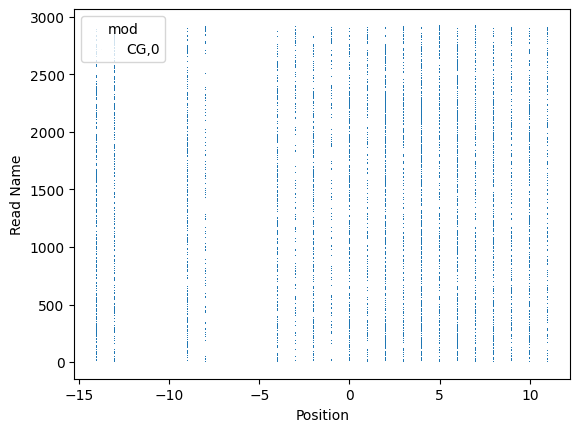

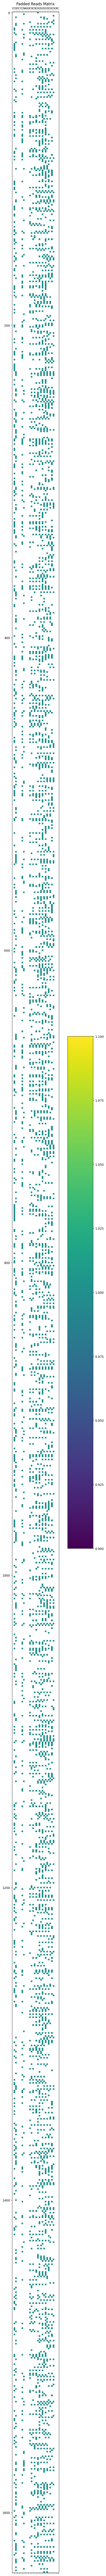

Padded reads saved to padded_reads.npy


In [6]:

# def main():
#     """Main function to execute all tasks."""
system_info()

experiment_name = "unedited_T_primerES_nCATS"
threshold_mC = 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# t2t_v1_1_cd55_30bps     # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'
region_start = 206586162
region_end = 206586192
region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)

output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, "padded_reads.npy")
 

Padded reads loaded successfully.


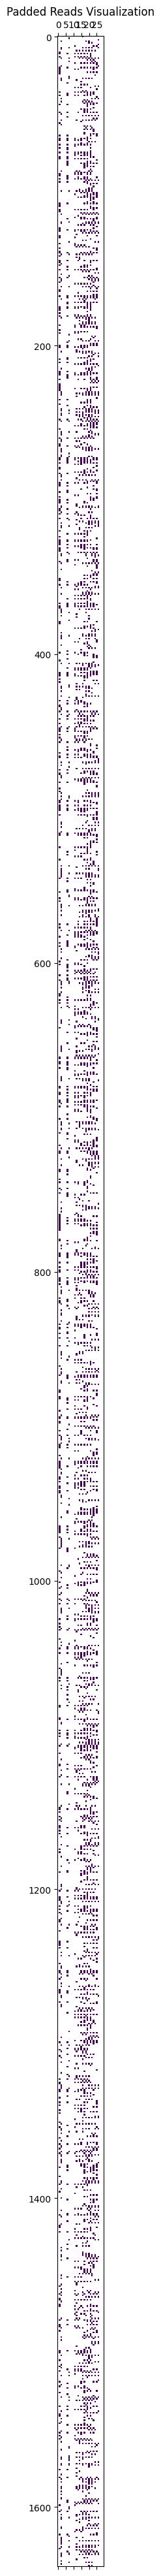

Visualization completed.
Region length: 30
CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC
30
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [1, 6, 11, 13, 15, 17, 19, 21, 23, 25]
Forward reads: 1018
Reverse reads: 621
DataFrame shape: (1639, 30)
         C      C      G    C    C    C      C      G    A    G  ...      G  \
count  0.0  382.0  317.0  0.0  0.0  0.0  313.0  112.0  0.0  0.0  ...  280.0   
mean   NaN    1.0    1.0  NaN  NaN  NaN    1.0    1.0  NaN  NaN  ...    1.0   
std    NaN    0.0    0.0  NaN  NaN  NaN    0.0    0.0  NaN  NaN  ...    0.0   
min    NaN    1.0    1.0  NaN  NaN  NaN    1.0    1.0  NaN  NaN  ...    1.0   
25%    NaN    1.0    1.0  NaN  NaN  NaN    1.0    1.0  NaN  NaN  ...    1.0   
50%    NaN    1.0    1.0  NaN  NaN  NaN    1.0    1.0  NaN  NaN  ...    1.0   
75%    NaN    1.0    1.0  NaN  NaN  NaN    1.0    1.0  NaN  NaN  ...    1.0   
max    NaN    1.0    1.0  NaN  NaN  NaN    1.0    1.0  NaN  NaN  ...    1.0   

           C      G      C

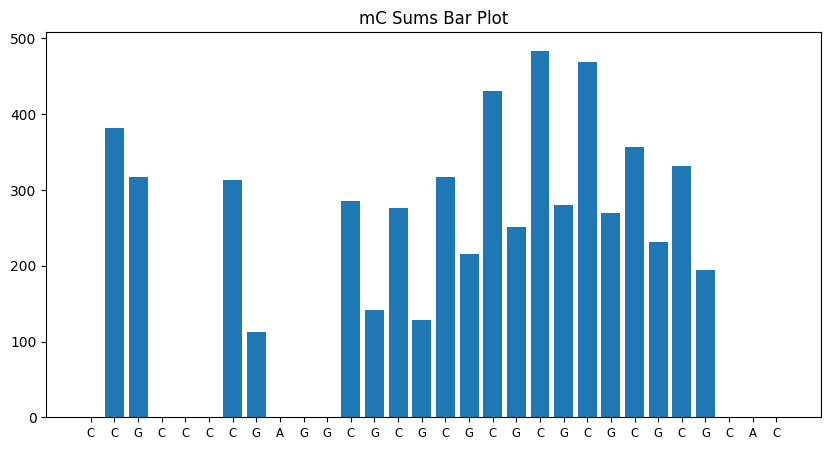

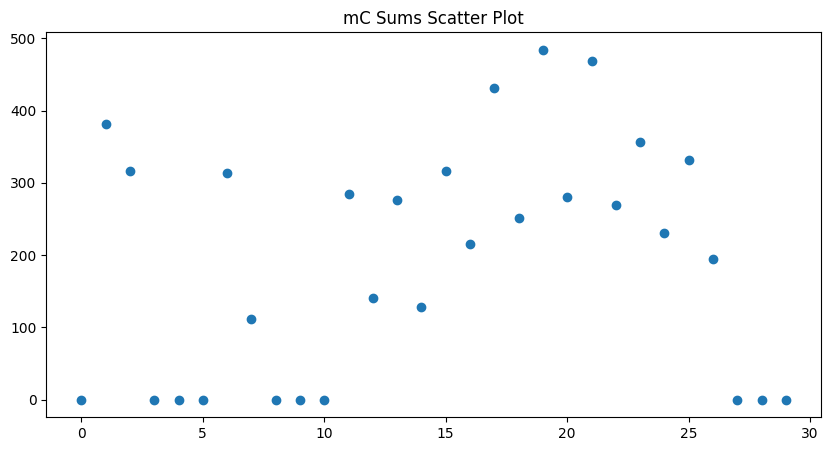

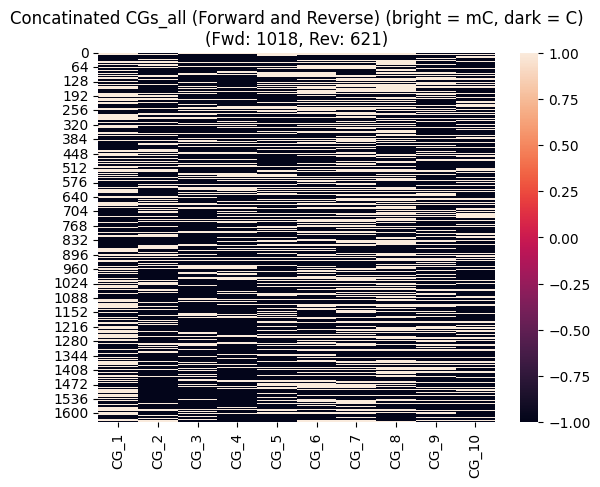

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


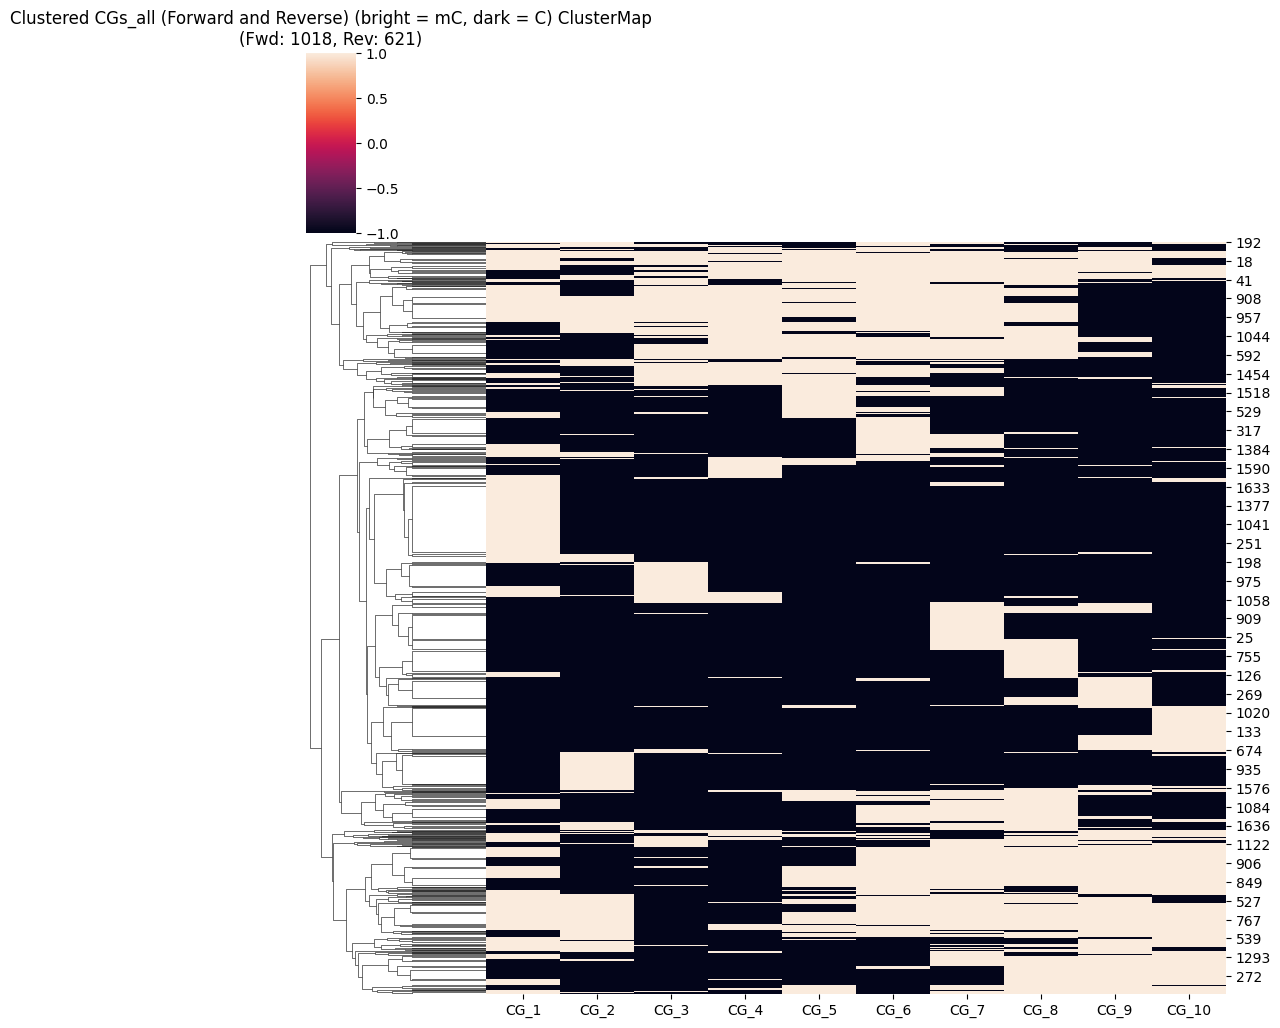

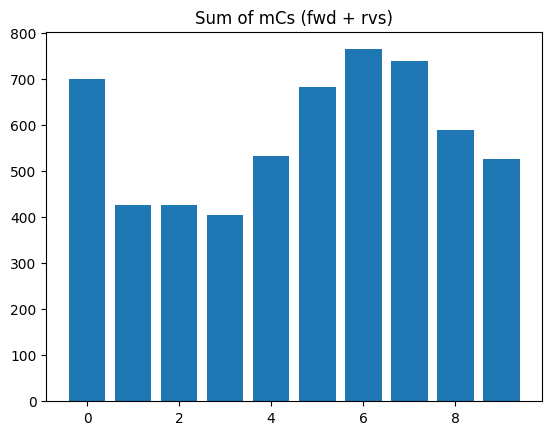

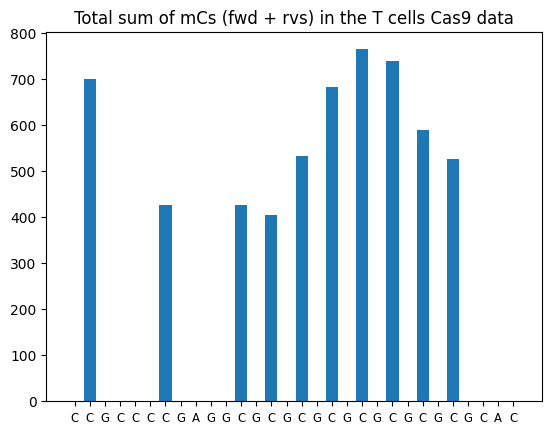

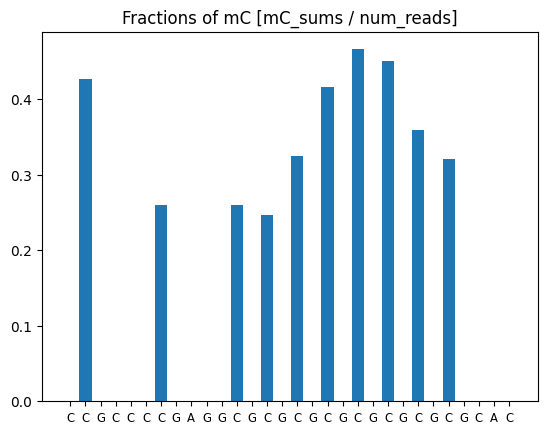

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


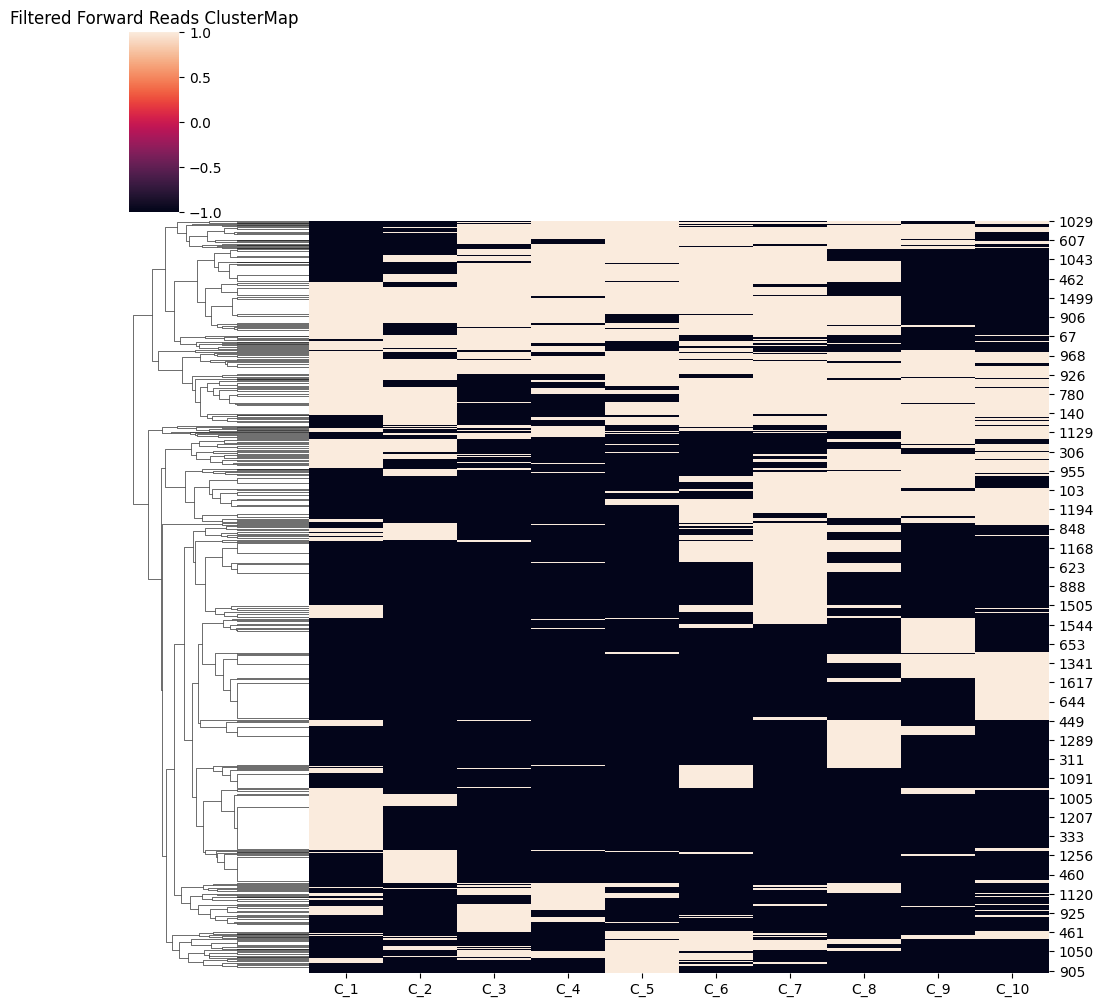

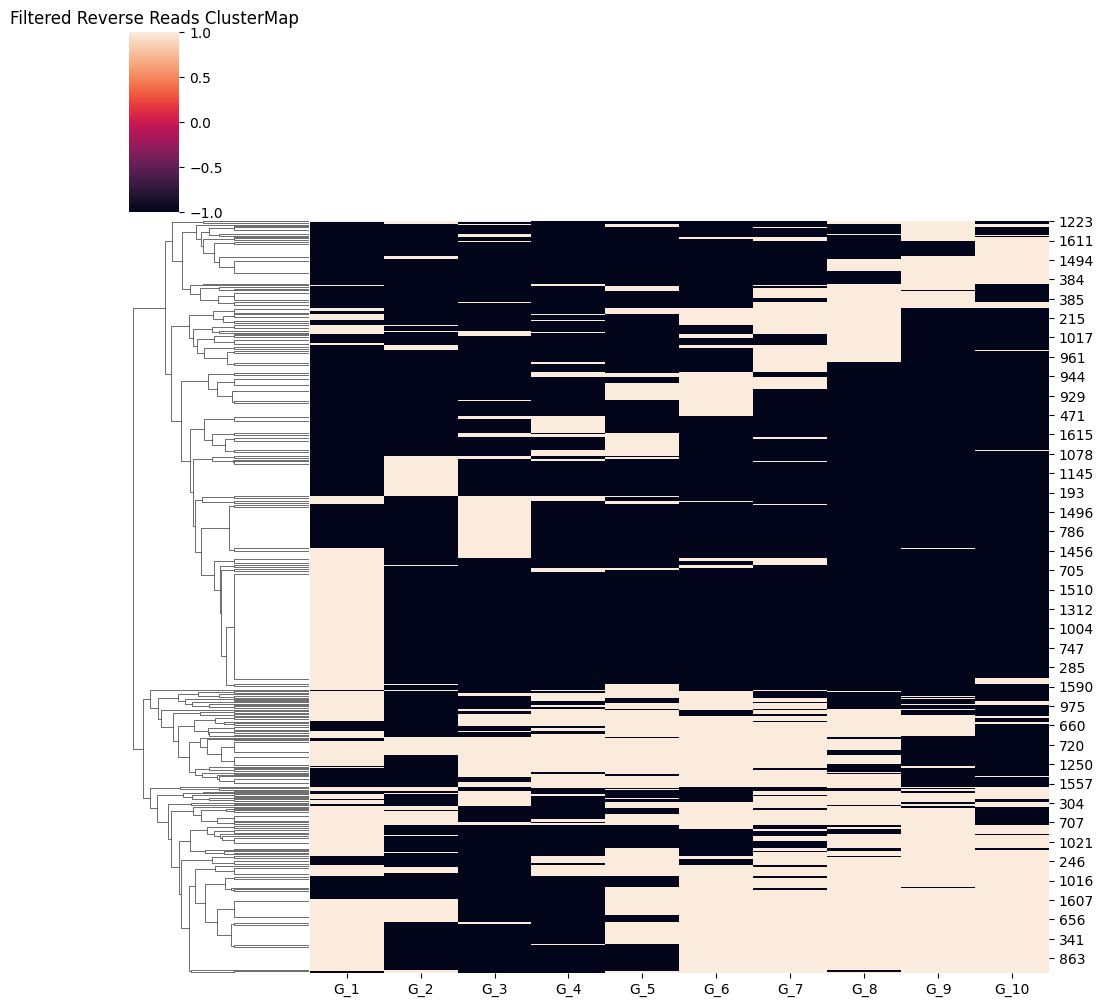

CGs_all saved as CG_combined_unedited_T_primerES_nCATS_numFWD1018_numRVS621_2025-01-28.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [7]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds
- try extanding to londer regions than my 30 bps
